# Analyze and processing

## 1. Time to Frequency converting

Previously, we were having fun creating different kind of waves and learned that sine wave is pretty much a component of any signal.

Now, if we have an arbitrary complex signal, can we decompose it into sine wave? Can we invert the addition process?

Yes, we can... well, most of the time. 

To decompose the signal, the common use algorithm is `fourier transform`. [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html#fourier-transforms-scipy-fft)

### 1.1 Fourier Transform

Named after Jean Baptiste Joseph Fourier (1768–1830) [link](https://www.embs.org/pulse/articles/highlights-in-the-history-of-the-fourier-transform/#:~:text=Surprisingly%2C%20this%20method%20for%20derivation,institute%20in%201811%20%5B11%5D.)

For visual interpretation: [Youtube](https://www.youtube.com/watch?v=spUNpyF58BY)

A nice source of knowledge: [Link](https://www.thefouriertransform.com/)

<u>My attempt</u>

To me, start by understanding Fourier Series helps me to understand Fourier Transform.

#### Fourier Series

[quote](https://en.wikipedia.org/wiki/Fourier_series#:~:text=A%20Fourier%20series%20(%2F%CB%88f,be%20determined%20using%20harmonic%20analysis.)
> A Fourier series (/ˈfʊrieɪ, -iər/[1]) is a sum that represents a periodic function as a sum of sine and cosine waves. The frequency of each wave in the sum, or harmonic, is an integer multiple of the periodic function's fundamental frequency. Each harmonic's phase and amplitude can be determined using harmonic analysis. 

The key is for any signal that is periodic, the Fourier Series can represent it. 

Periodic signal is a signal that repeat after some period of time. A sum of periodic signal is periodic.

Period signal satisfy the next properties.
$$ x(t) == x(t + T_0) $$
$T_0$ is a period. 

The equation mean, there is signal *x* which is a function of time *t*. $T_0$ is some number. If this signal *x* repeats every 5 second ($T_0 = 5$) then x[0] == x[0 + 5], x[1] == x[1 + 5], ...

Every signal we have seen in the previous lecture/lab is periodic signal.

Thus, the sum of periodic signal is represented with a sum of sine and cosine at different frequencies, amplitudes, and phases.

The example of fourier series are all the wave in the previous lecture.

$$
x(t) = \frac{4}{\pi} \sum_{k=1}^{\infty} \frac{1}{2 k - 1} \sin \left( 2 \pi \left(2 k - 1 \right) t \right)
$$

Here is the square wave equation, we know right away that the square wave consists of odd harmonics. If we refactor the equation into a series of sum, it will look like this.

$$ 
x(t) = \frac{4}{\pi} \times ( \frac{\sin(2\pi t)}{1} + \frac{\sin(2\pi 3t)}{3} + \frac{\sin(2\pi 5t)}{5} + ... )
$$

For an easier to read formula, we encapulate the $2\pi t$ into $\omega$

$$ 
x(t) = \frac{4}{\pi} \times ( \frac{\sin(\omega)}{1} + \frac{\sin(3\omega)}{3} + \frac{\sin(5\omega)}{5} + ... )
$$

well, just to show you that it is a sum of sine wave. Thus, it is fourier transform.

##### Fourier Series General Form

Here is the general form of Fourier series.

$$
x(t) = a_0 + \sum_{n=1}^{\infty} a_n \cos(nt\frac{\pi}{L}) + \sum_{n=1}^{\infty} b_n \sin(nt\frac{\pi}{L})
$$

where *L* is half of the period and $a_0,a_n,b_n$ are the coefficient.

Fun fact:

Euler’s Equation is $ e^{i\theta} = \cos(\theta) + i\sin{\theta}$

and $ \cos{\theta} = \frac{e^{i\theta} + e^{-i\theta}}{2} $, $\sin{\theta} = \frac{-ie^{i\theta} + ie^{-i\theta}}{2}$

Thus the Fourier Series can be written as

$$
x(t) = a_0 + \sum_{n=-\infty}^{\infty} U_n e^{int\frac{\pi}{L}}
$$

Full derivation is [here](http://www.ee.ic.ac.uk/hp/staff/dmb/courses/E1Fourier/00300_ComplexFourier.pdf)

Here is the trick, all we have to find is the coefficient $a_0,a_n,b_n$ and here is how.

$$
a_0 = \frac{1}{2L} \int_{-L}^{L} x(t) dt
$$

$$
a_n = \frac{1}{L} \int_{-L}^{L} x(t) \cos(nt\frac{\pi}{L}) dt
$$

$$
b_n = \frac{1}{L} \int_{-L}^{L} x(t) \sin(nt\frac{\pi}{L}) dt
$$

$$
U_n = \frac{1}{L} \int_{-L}^{L} x(t) e^{-int\frac{\pi}{L}}  dt
$$

Don't get scared by the integration yet. My point is, to find the coefficient, we only consider 1 cycle. For mathematic nerd, continue to read [this](https://www.mathsisfun.com/calculus/fourier-series.html)


#### Fourier Transform

Not every signal is periodic. In fact, most of the signals are aperiodic. What is aperiodic signal? It is a signal that never repeats itself (yet).

$$ \forall{T_{0}} (x(t) != x(t + T_0)) $$

In human word, you can not find and number of $T_0$ that makes $x[t] == x[t + T_0]$ for all *t*. Or, there is no period/interval.

Therefore, instead of looking at the signal in a single period/interval $[-L,L]$ like the series, Fourier Transform look at the signal as the period is infinity. 

$$
F(x(t)) = X(f) = \int_{-\infty}^{\infty} x(t) e^{-i2\pi ft} dt
$$

We ditch the *L* which is half period which means there is no period in the equation.

$F()$ is a Forward Fourier Transform (FT) function. $x()$ is function of time representing a signal. $X()$ is a transformed signal which is now a function of frequency representing a signal in frequency domain.

We can reverse the operation using Inverse Fourier Transform (iFT) ($F^{-1}$)

$$
F^{-1}(X(f)) = x(t) = \int_{-\infty}^{\infty} X(f) e^{i2\pi ft} df
$$

#### Discrete Fourier Transform and Fast Fourier Transform

[How are the Fourier Series, Fourier Transform, DTFT, DFT, FFT, LT and ZT Related?](https://www.youtube.com/watch?v=2kMSLqAbLj4)

What we have learnt so far is the continous version of the function. For us, programmer, we don't have `countinuous` signal. In fact, we don't have a infinte long signal. When we are calculating, we have a finite reorded/sampled signal. This is where we have an discrete version of the function. Now, we take a look at Discrete Fourier Transform (DFT). And Fast Fourier Transform (FFT) is actually the faster version of DFT. 

Instead of integrating over the graph, we have a summation over the range of time.

$$
\text{FFT}(x[n]) = X[k] = \sum_{n=0}^{N-1} x[n] e^{-i2\pi k\frac{n}{N} }
$$

$$
\text{FFT}^{-1}(X[k]) = x[n] = \frac{1}{N} \sum_{n=0}^{N-1} X[k] e^{i2\pi k\frac{n}{N} }
$$

We change the notation from *t* to *n* which mean a sample of time and *f* to *k* which mean a sample frequency. *N* is the number of sample in calculation. 

Now that we have a functon, let's do this from scratch. It's fun.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft
plt.style.use('seaborn-whitegrid')

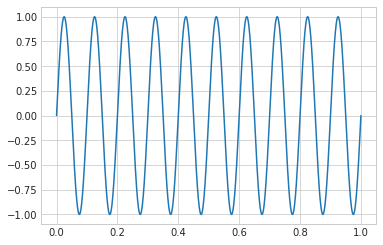

In [2]:
# Create a known signal
fs = 1000
t = np.arange(start=0, stop=1+ 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 10 * t + 0) # f = 10

plt.plot(t,x)
plt.show()

(15.694948758748339-499.92111733202006j)


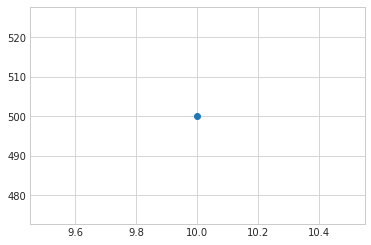

In [3]:
N = len(x)
# let's find X[k] where k = 10
k = 10
X_10 = 0

for n in range(N):
    X_10 += x[n] * np.exp( -1j * 2 * np.pi * k * n / N )

print(X_10)

plt.scatter(k, abs(X_10))
plt.show()

The result we get is a complex number and the magnitude is 500?

Let's complete the other `k` and arrange them in the array of `X`.

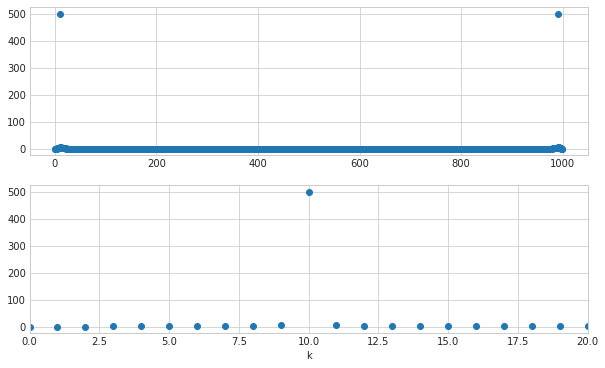

In [4]:
N = len(x)
# let's find X[k] 
X = []
for k in range(fs):
    # Use broadcasting instead of a loop
    X.append((x * np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )).sum())

fig, ax = plt.subplots(nrows=2, figsize=(10,6))

ax[0].scatter(range(fs),np.abs(X))

ax[1].scatter(range(fs),np.abs(X))
ax[1].set_xlim(0,20)
ax[1].set_xlabel('k')
plt.show()

Ok, if we find the `k` in a range of `fs`, there are two peaks which are 10 and 990. Why? Temporal aliasing from last lecture. We can extend the range of `fs`, and we will get even more aliasing.

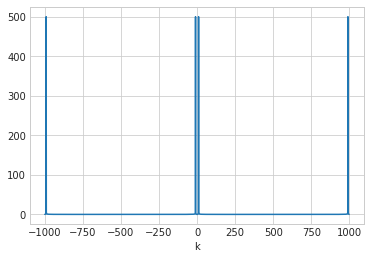

In [5]:
N = len(x)
# let's find X[k] 
X = []
for k in range(-fs, fs):
    X.append((x * np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )).sum())

plt.plot(range(-fs, fs),np.abs(X))
plt.xlabel('k')
plt.show()

Ok. We sort the `k` out. It is a frequency range which the range is infinite because of the temporal alias.

But then what is 500?

Let's amplify our signal `x`. Right now its amplitude is 1. Let's go 5.

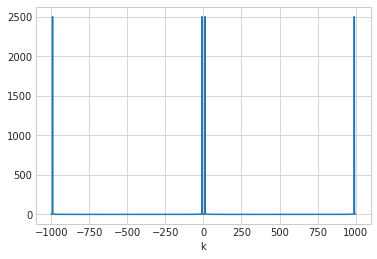

In [6]:
N = len(x)
# Amplify by 5
x = 5 * x 
X = []
for k in range(-fs, fs):
    X.append((x * np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )).sum())

plt.plot(range(-fs, fs),np.abs(X))
plt.xlabel('k')
plt.show()

Ok. The result magnitude is 2500 which is 5 times as much. Does this mean, in order to get the real magnitude, we divide the result by 500?

Yes, but that is not all the cause. Let's extend the `x` from 1 second long to 2 seconds long.

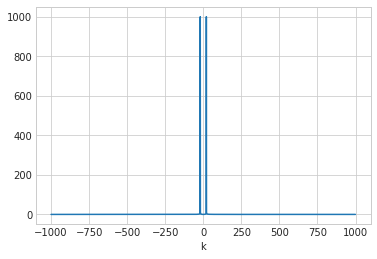

In [7]:
fs = 1000
t = np.arange(start=0, stop=2 + 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 10 * t + 0)

N = len(x)
X = []
for k in range(-fs, fs):
    X.append((x * np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )).sum())

plt.plot(range(-fs, fs),np.abs(X))
plt.xlabel('k')
plt.show()

Aha! The result magnitude is also scaled by the range of time. In fact, it scaled by the number of samples. Here, let's change the sampling rate.

But wait, where is 990 Hz go?

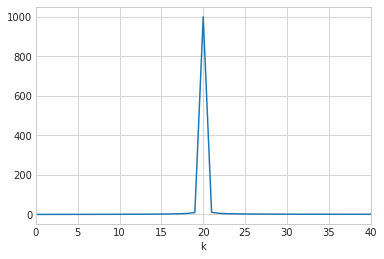

In [8]:
fs = 1000
t = np.arange(start=0, stop=2 + 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 10 * t + 0)

N = len(x)
X = []
for k in range(-fs, fs):
    X.append((x * np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )).sum())

plt.plot(range(-fs, fs),np.abs(X))
plt.xlabel('k')
# Zoom to the peak
plt.xlim(0,40)
plt.show()

Oh no, the peak that use to be 10 is now 20! Did I do something wrong?

Now, it is the time to understand the equation.

Let's plot the exponential function.

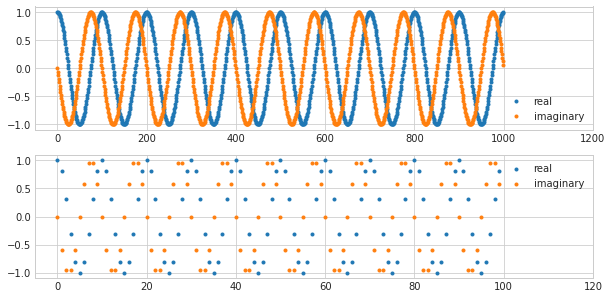

In [16]:
fig, ax = plt.subplots(nrows=2, figsize=(10,5))

k = 10
N = 1000
expo = np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )

ax[0].scatter(range(N), expo.real, label='real',marker='.')
ax[0].scatter(range(N), expo.imag, label='imaginary',marker='.')
ax[0].set_xlim(-50,1200)
ax[0].legend()

k = 10
N = 100
expo = np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )

ax[1].scatter(range(N), expo.real, label='real',marker='.')
ax[1].scatter(range(N), expo.imag, label='imaginary',marker='.')
ax[1].set_xlim(-5,120)
ax[1].legend()

plt.show()

The exponential function is, in fact, a sine and cosine wave. Well, we already know since the Euler equation from the beginning.

`k` is the frequency of the oscillation. `N` together with `n` creates a sampling interval. When you have more `N`, you have a higher resolution of the sine and cosine wave.

This means, the `fft` function has no idea what is the actual sampling frequency of the signal. 

What it does is, create a template of sine, cosine and project the signal (x[n] * expo[x]) to the template. 

Let's plot the multiplication step.

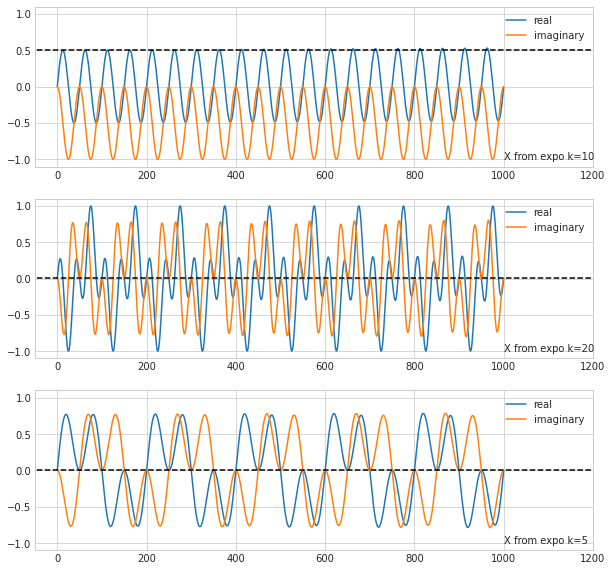

In [44]:
fs = 1000
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 10 * t + 0)

fig, ax = plt.subplots(nrows=3, figsize=(10,10))

N = len(x)

k = 10
expo = np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )
X_10 = x * expo
ax[0].plot(range(N), X_10.real, label='real')
ax[0].plot(range(N), X_10.imag, label='imaginary')
ax[0].hlines(y=np.abs(X_10.mean()), xmin=-100, xmax=1500, colors='black', linestyles='dashed')
ax[0].set_ylim(-1.1, 1.1)
ax[0].set_xlim(-50,1200)
ax[0].text(x=1000,y=-1,s='X from expo k=10')
ax[0].legend()

k = 20
expo = np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )
X_20 = x * expo
ax[1].plot(range(N), X_20.real, label='real')
ax[1].plot(range(N), X_20.imag, label='imaginary')
ax[1].hlines(y=np.abs(X_20.mean()), xmin=-100, xmax=1500, colors='black', linestyles='dashed')
ax[1].set_ylim(-1.1, 1.1)
ax[1].set_xlim(-50,1200)
ax[1].text(x=1000,y=-1,s='X from expo k=20')
ax[1].legend()

k = 5
expo = np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )
X_5 = x * expo
ax[2].plot(range(N), X_5.real, label='real')
ax[2].plot(range(N), X_5.imag, label='imaginary')
ax[2].hlines(y=np.abs(X_5.mean()), xmin=-100, xmax=1500, colors='black', linestyles='dashed')
ax[2].set_ylim(-1.1, 1.1)
ax[2].set_xlim(-50,1200)
ax[2].text(x=1000,y=-1,s='X from expo k=5')
ax[2].legend()

plt.show()

The `dashed` line is an average magnitude of the projection. It is actually the same as summation in the DFT/FFT equation but scale down.

The essential is when the exponential function sync with the signal, the `dashed` line is not **zero**. 

*Try playing with the phase and see the result*

*Try playing with the DC component and see the result*

Now, let's extend the signal to 2 seconds. In fact, this effect is causes from bigger `N`. We can just pad a zero at the end of signal and get the same effect.

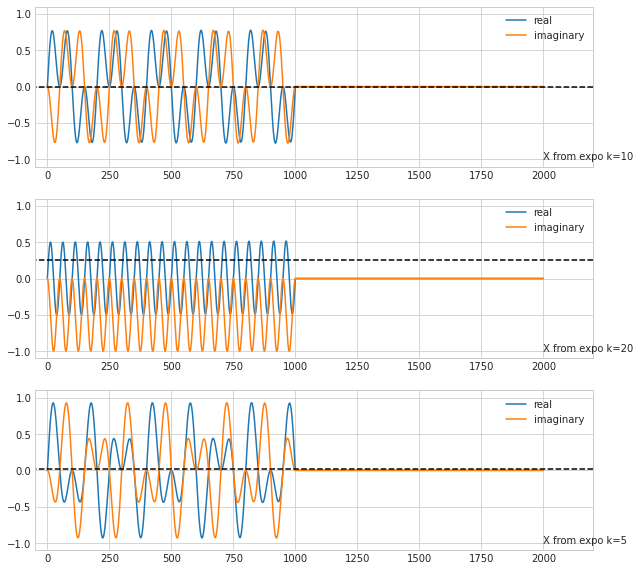

In [54]:
fs = 1000
# Extend the second
t = np.arange(start=0, stop=2 + 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 10 * t + 0)
# the last second is all zero
x[1000:] = 0
fig, ax = plt.subplots(nrows=3, figsize=(10,10))

N = len(x)

k = 10
expo = np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )
X_10 = x * expo
ax[0].plot(range(N), X_10.real, label='real')
ax[0].plot(range(N), X_10.imag, label='imaginary')
ax[0].hlines(y=np.abs(X_10.mean()), xmin=-100, xmax=2500, colors='black', linestyles='dashed')
ax[0].set_ylim(-1.1, 1.1)
ax[0].set_xlim(-50,2200)
ax[0].text(x=2000,y=-1,s='X from expo k=10')
ax[0].legend()

k = 20
expo = np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )
X_20 = x * expo
ax[1].plot(range(N), X_20.real, label='real')
ax[1].plot(range(N), X_20.imag, label='imaginary')
ax[1].hlines(y=np.abs(X_20.mean()), xmin=-100, xmax=2500, colors='black', linestyles='dashed')
ax[1].set_ylim(-1.1, 1.1)
ax[1].set_xlim(-50,2200)
ax[1].text(x=2000,y=-1,s='X from expo k=20')
ax[1].legend()

k = 5
expo = np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )
X_5 = x * expo
ax[2].plot(range(N), X_5.real, label='real')
ax[2].plot(range(N), X_5.imag, label='imaginary')
ax[2].hlines(y=np.abs(X_5.mean()), xmin=-100, xmax=2500, colors='black', linestyles='dashed')
ax[2].set_ylim(-1.1, 1.1)
ax[2].set_xlim(-50,2200)
ax[2].text(x=2000,y=-1,s='X from expo k=5')
ax[2].legend()

plt.show()

Let's think about it.

Since the beginning, we plot the signal along with the time, but the DFT function does not have a sense of time.

Now, let's plot the 2-second 10 Hz sine signal using a sampling rate of 1000 Hz and 1-second 20 Hz sine wave using sampling rate of 2000 Hz.


(2001,) (2001,)
[False False False ... False False False]


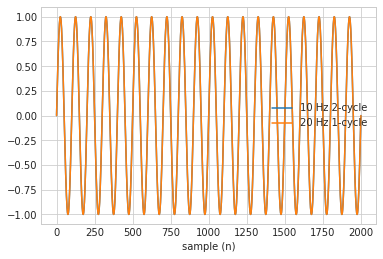

In [62]:
fs = 1000
t = np.arange(start=0, stop=2 + 1/fs, step=1/fs)
x_1 = np.sin(2 * np.pi * 10 * t + 0)

fs = 2000
t = np.arange(start=0, stop=1 + 1/fs, step=1/fs)
x_2 = np.sin(2 * np.pi * 20 * t + 0)

print(x_1.shape, x_2.shape)
plt.plot(range(len(x_1)), x_1, label='10 Hz 2-cycle')
plt.plot(range(len(x_2)), x_2, label='20 Hz 1-cycle')
plt.xlabel('sample (n)')
plt.legend()
plt.show()

You can see, when plot, both signals look the same. 

To the eye of DFT, it sees the same signal, both extended 10Hz and 20Hz.

Is this means we can not use DFT with signal longer than 1 second because the function will misinterpret the result? No.

The interpretation is up to us.

`k` is not a frequency. It will equal to the frequency if and only if `N` == sampling_rate

`k` is an index of an array. The content and meaning is up to us.

Thus, we can think of `k` as a smaller step of frequency. Instead of [0,1,2,3,...], we get [0,0.5,1,1.5,2,...]

Hence, when we increase the `N` either by extending the signal or padding the zero, we get a higher resolution of frequency range.

"What, we can have 0.5 Hz?" of course, we can. Oscillation frequency is not limited to an integer.

With this knowledge, we modify the DFT as follow.

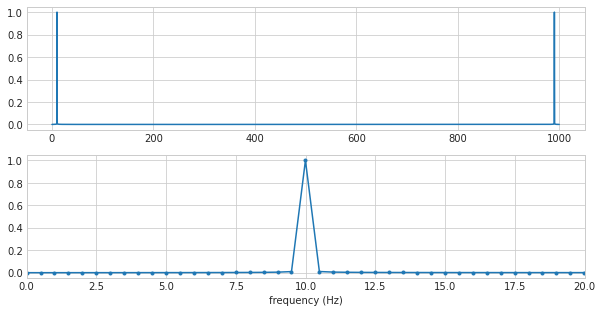

In [86]:
fs = 1000
t = np.arange(start=0, stop=2+ 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 10 * t + 0)
# Try the padding version
# x[1000:] = 0
N = len(x)
freq_range = np.arange(start=0, stop=fs, step=fs/N)
X = []
for k in range(N):
    X.append((x * np.exp( -1j * 2 * np.pi * k * np.arange(N) / N )).sum())

fig, ax = plt.subplots(nrows=2, figsize=(10,5))
# The correct scale is N//2, but be careful, this N is the number of sample point with out padding the zero.
ax[0].plot(freq_range,np.abs(X)/(N//2))

ax[1].plot(freq_range,np.abs(X)/(N//2), marker='.')
ax[1].set_xlim(0,20)
ax[1].set_xlabel('frequency (Hz)')
plt.show()

Are you having fun?

Lets summarized what we have learned about DFT/FFT.

$$
\text{FFT}(x[n]) = X[k] = \sum_{n=0}^{N-1} x[n] e^{-i2\pi k\frac{n}{N} }
$$

*k* is the index of frequency array. The interpretation of what each *k* equal to which frequency, you need to map to the actual frequency range calculate separately.

*N* is the total number of sample in calculation.

Increasing the number of sample by either (1) extend the time range or (2) padding zero will yield a smaller step/ higher resolution of frequency range result.

`freq_range = np.arange(start=0, stop=fs, step=fs/N)`

The result *X* is a summation of data points after projected to the exponential function. To scale down with `N//2` where `N` is the number of data point before zero pading.

Let's finish this.

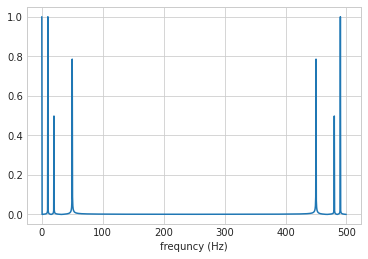

In [148]:
def myDFT(x: np.ndarray, fs:int, padding:int = 0) -> tuple:
    """
    x: is a signal in numpy array. Right now onyl support (n_sample, ) shape
    fs: the sampling rate. This only be used for calculatin frequency_range
    padding: number of zero to pad to increase the size of `N`
    """
    scale_factor = len(x)//2
    # Padding
    shape = list(x.shape)
    shape[-1] = padding
    x = np.concatenate([x, np.zeros(shape)], axis=-1)
    # DFT
    N = len(x)
    k = np.arange(N).reshape(-1,1)
    n = np.arange(N).reshape(1,-1)
    X = np.abs((x * np.exp( -1j * 2 * np.pi * k * n / N )).sum(axis=-1)) / scale_factor
    # The DC component will be twice as much because of the mirror.
    X[0] = X[0] / 2
    freq_range = np.arange(start=0, stop=fs, step=fs/N)
    return (X, freq_range)

fs = 500
t = np.arange(start=0, stop=2 + 1/fs, step=1/fs)
x = 1 + np.sin(2 * np.pi * 10 * t + 0) + (0.5 * np.sin(2 * np.pi * 20 * t + 0)) + (0.8 * np.sin(2 * np.pi * 50 * t + 0))

# Play with the padding
X, freq_range = myDFT(x,fs,padding=0)

plt.plot(freq_range,X)
plt.xlabel('frequncy (Hz)')
plt.show()

Well, fortunately, NumPy has FFT function too. It supports flexible shape. This means you can do FFT on multiple signals at the same time.

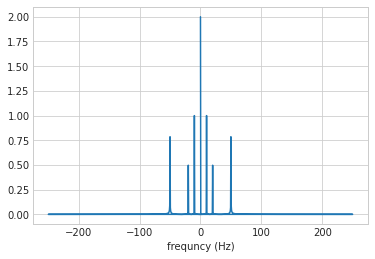

In [155]:
fs = 500
t = np.arange(start=0, stop=2 + 1/fs, step=1/fs)
x = 1 + np.sin(2 * np.pi * 10 * t + 0) + (0.5 * np.sin(2 * np.pi * 20 * t + 0)) + (0.8 * np.sin(2 * np.pi * 50 * t + 0))

X = np.fft.fft(x, axis=-1, n=None)
freq_range = np.fft.fftfreq(x.shape[-1], d=1/fs )
# You have to perform the absolute and the scale down yourself.
# Thus, the np.fft.fft only perform the sum of x[n] * expo[x] for us
plt.plot(freq_range,np.abs(X)/(len(x)/2))
plt.xlabel('frequncy (Hz)')
plt.show()

### 1.2 Short Time Fourier Transform (STFT)

As of now, The transformation we did is using the entire range of signal. It is fine when we want to have a brief look/analyze of the signal.

However, in the real world, we might interest in the change of frequency through time which the DFT/FFT does not provide.

In this matter, we use Short-Time-Fourier-Transform (STFT)

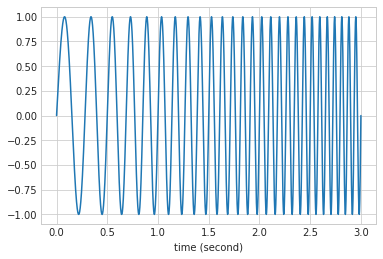

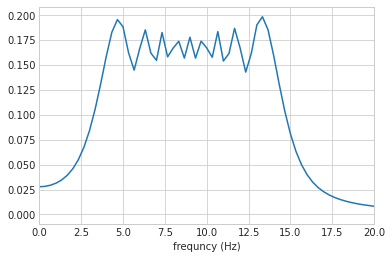

In [172]:
fs = 1000
t = np.arange(start=0, stop=3 + 1/fs, step=1/fs)
f = np.linspace(start=3, stop=9, num=len(t))
x = np.sin(2 * np.pi * f * t + 0)

plt.plot(t,x)
plt.xlabel('time (second)')
plt.show()

X = np.fft.fft(x, axis=-1, n=None)
freq_range = np.fft.fftfreq(x.shape[-1], d=1/fs )
plt.plot(freq_range[:fs//2],np.abs(X[:fs//2])/(len(x)/2))
plt.xlabel('frequncy (Hz)')
plt.xlim(0,20)
plt.show()

The above example shows the non-stationary signal. This signal has a variable frequency. 
The result of DFT, not only incorrect, does not show the change of frequency shift though time.

Let's try to use STFT. Don't worry, we will not do from scratch. 